In [1]:
#task,buliding a ANN model for travel insurance prediction

In [2]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize']=(15,10)
%matplotlib inline

In [7]:
#loading the dataset
df=pd.read_csv('C://Users/sojore/Documents/travel insurance prediction data/TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [8]:
#exploring the dataset
df.shape

(1987, 10)

In [9]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [10]:
df.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [11]:
df.groupby('Employment Type')['Employment Type'].agg('count')

Employment Type
Government Sector                570
Private Sector/Self Employed    1417
Name: Employment Type, dtype: int64

In [12]:
df.head(1)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0


<function matplotlib.pyplot.show(close=None, block=None)>

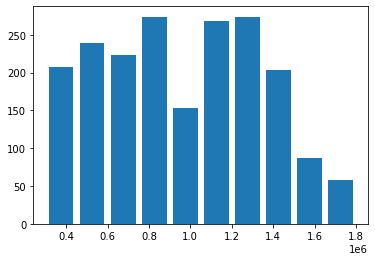

In [14]:
plt.hist(df.AnnualIncome,rwidth=0.8)
plt.show

In [19]:
#no missing values,so we handle the outliers
df['annualincome_Per_m']=df['AnnualIncome']/df['FamilyMembers']
df['Age2']=df['Age']**2
df['FamilyMembers2']=df['FamilyMembers']**2
df['AnnualIncome2']=df['AnnualIncome']**2
df.head(2)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,annualincome_Per_m,Age2,FamilyMembers2,AnnualIncome2
0,0,31,Government Sector,Yes,400000,6,1,No,No,0,66666.666667,961,36,160000000000
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,178571.428571,961,49,1562500000000


<function matplotlib.pyplot.show(close=None, block=None)>

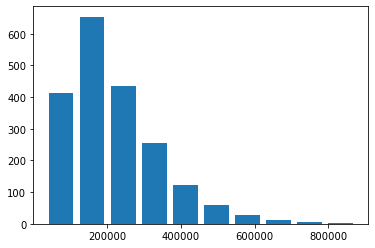

In [20]:
plt.hist(df.annualincome_Per_m,rwidth=0.8)
plt.show

In [22]:
df1=df.copy()
df1.head(1)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,annualincome_Per_m,Age2,FamilyMembers2,AnnualIncome2
0,0,31,Government Sector,Yes,400000,6,1,No,No,0,66666.666667,961,36,160000000000


In [25]:
#using quantile function to get rid of outliers
ll1=df1.Age2.quantile(0.01)
ul1=df1.Age2.quantile(0.99)
df1[(df1.Age2<=ll1) | (df1.Age2>=ul1)]
df2=df1[(df1.Age2>ll1) & (df1.Age2<ul1)]
df2.shape

(1781, 14)

In [28]:
ll2=df2.FamilyMembers2.quantile(0.01)
ul2=df2.FamilyMembers2.quantile(0.99)
df2[(df2.FamilyMembers2<=ll2) | (df2.FamilyMembers2>=ul2)]
df3=df2[(df2.FamilyMembers2>ll2) & (df2.FamilyMembers2<ul2)]
df3.shape

(1646, 14)

In [31]:
ll3=df3.AnnualIncome2.quantile(0.01)
ul3=df3.AnnualIncome2.quantile(0.99)
df3[(df3.AnnualIncome2<=ll3) | (df3.AnnualIncome2>=ul3)]
df4=df3[(df3.AnnualIncome2>ll3) & (df3.AnnualIncome2<ul3)]
df4.shape

(1544, 14)

In [36]:
Q1=df4.annualincome_Per_m.quantile(0.25)
Q3=df4.annualincome_Per_m.quantile(0.75)
IQR=Q3-Q1
ll4=Q1-IQR*0.5
ul4=Q3+IQR*0.5
df4[(df4.annualincome_Per_m<=ll4) | (df4.annualincome_Per_m>=ul4)]
df5=df4[(df4.annualincome_Per_m>ll4) & (df4.annualincome_Per_m<ul4)]
df5.shape

(1337, 14)

<function matplotlib.pyplot.show(close=None, block=None)>

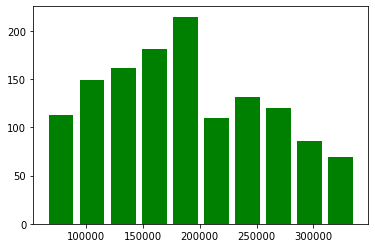

In [38]:
plt.hist(df5.annualincome_Per_m,rwidth=0.8,color='green')
plt.show

In [40]:
#this is kinda of a normal distribution

<function matplotlib.pyplot.show(close=None, block=None)>

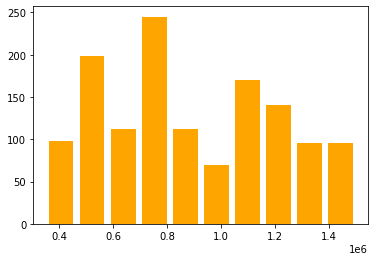

In [41]:
plt.hist(df5.AnnualIncome,rwidth=0.8,color='orange')
plt.show

In [43]:
df5.head(2)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,annualincome_Per_m,Age2,FamilyMembers2,AnnualIncome2
0,0,31,Government Sector,Yes,400000,6,1,No,No,0,66666.666667,961,36,160000000000
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,178571.428571,961,49,1562500000000


In [53]:
#getting dummy variable for categorical columns using labelencoder
from sklearn.preprocessing import LabelEncoder
le_EmployT=LabelEncoder()
df5['Employment Type']=le_EmployT.fit_transform(df5['Employment Type'])
df6=df5.copy()
df6.head()


<ipython-input-53-c9fb2105b634>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Employment Type']=le_EmployT.fit_transform(df5['Employment Type'])


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,annualincome_Per_m,Age2,FamilyMembers2,AnnualIncome2
0,0,31,0,Yes,400000,6,1,No,No,0,66666.666667,961,36,160000000000
1,1,31,1,Yes,1250000,7,0,No,No,0,178571.428571,961,49,1562500000000
2,2,34,1,Yes,500000,4,1,No,No,1,125000.000000,1156,16,250000000000
3,3,28,1,Yes,700000,3,1,No,No,0,233333.333333,784,9,490000000000
4,4,28,1,Yes,700000,8,1,Yes,No,0,87500.000000,784,64,490000000000


In [54]:
#using replace function to replace yes and no values in int vals
df6=df6.replace(['Yes','No'],[1,0])
df6.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,annualincome_Per_m,Age2,FamilyMembers2,AnnualIncome2
0,0,31,0,1,400000,6,1,0,0,0,66666.666667,961,36,160000000000
1,1,31,1,1,1250000,7,0,0,0,0,178571.428571,961,49,1562500000000
2,2,34,1,1,500000,4,1,0,0,1,125000.000000,1156,16,250000000000
3,3,28,1,1,700000,3,1,0,0,0,233333.333333,784,9,490000000000
4,4,28,1,1,700000,8,1,1,0,0,87500.000000,784,64,490000000000


In [55]:
#dropping unneccesary columns
df7=df6.drop(['Unnamed: 0','annualincome_Per_m','Age2','FamilyMembers2','AnnualIncome2'],axis='columns')
df7.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


In [56]:
df7.dtypes

Age                    int64
Employment Type        int64
GraduateOrNot          int64
AnnualIncome           int64
FamilyMembers          int64
ChronicDiseases        int64
FrequentFlyer          int64
EverTravelledAbroad    int64
TravelInsurance        int64
dtype: object

In [57]:
X=df7.drop('TravelInsurance',axis=1)
X.shape

(1337, 8)

In [60]:
y=df7.TravelInsurance
y.sample(3)

1426    0
39      1
762     0
Name: TravelInsurance, dtype: int64

In [61]:
#splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [62]:
len(X_train)

1069

In [63]:
X_train.shape

(1069, 8)

In [65]:
y_train[:10]

486     0
995     0
944     0
1072    0
1512    0
15      0
411     0
585     1
665     0
691     0
Name: TravelInsurance, dtype: int64

In [66]:
#importing important libraries for ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [67]:
model=keras.Sequential([
    keras.layers.Dense(8,input_dim=8,activation='relu'),
    keras.layers.Dropout(0.5),#this layer will drop 50% of the neurons-----the good practice is we put dropout layer after each
    #hidden layer
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
134/134 [==============================] - 76s 13ms/step - loss: 28284.1172 - accuracy: 0.5978
Epoch 2/100
134/134 [==============================] - 2s 12ms/step - loss: 11865.8945 - accuracy: 0.6567
Epoch 3/100
134/134 [==============================] - 1s 10ms/step - loss: 4617.8491 - accuracy: 0.6455
Epoch 4/100
134/134 [==============================] - 1s 11ms/step - loss: 1472.0708 - accuracy: 0.6651
Epoch 5/100
134/134 [==============================] - 1s 11ms/step - loss: 949.7523 - accuracy: 0.6894A: 0s - loss: 1038.1761 - accuracy: 0.68
Epoch 6/100
134/134 [==============================] - 2s 16ms/step - loss: 389.2057 - accuracy: 0.6857 1s - loss: 389
Epoch 7/100
134/134 [==============================] - 2s 13ms/step - loss: 200.9617 - accuracy: 0.6885
Epoch 8/100
134/134 [==============================] - 2s 17ms/step - loss: 115.1951 - accuracy: 0.6941
Epoch 9/100
134/134 [==============================] - 2s 13ms/step - loss: 179.1390 - accuracy: 0.6829
Ep

134/134 [==============================] - 1s 6ms/step - loss: 0.6096 - accuracy: 0.7016
Epoch 76/100
134/134 [==============================] - 1s 7ms/step - loss: 0.6096 - accuracy: 0.7016
Epoch 77/100
134/134 [==============================] - 1s 6ms/step - loss: 0.6096 - accuracy: 0.7016: 0s - loss: 0.6106 - accuracy: 0.70
Epoch 78/100
134/134 [==============================] - 1s 6ms/step - loss: 0.6096 - accuracy: 0.7016: 0s - loss: 0.5
Epoch 79/100
134/134 [==============================] - 1s 5ms/step - loss: 0.6096 - accuracy: 0.7016
Epoch 80/100
134/134 [==============================] - 1s 6ms/step - loss: 0.6096 - accuracy: 0.7016
Epoch 81/100
134/134 [==============================] - 1s 5ms/step - loss: 0.6096 - accuracy: 0.7016
Epoch 82/100
134/134 [==============================] - 1s 4ms/step - loss: 0.6096 - accuracy: 0.7016
Epoch 83/100
134/134 [==============================] - 1s 6ms/step - loss: 0.6095 - accuracy: 0.7016
Epoch 84/100
134/134 [=====================

In [68]:
#testing the model on the test dataset
model.evaluate(X_test,y_test)

9/9 [==============================] - 209s 1s/step - loss: 0.6255 - accuracy: 0.6828


[0.6255004405975342, 0.6828358173370361]

In [69]:
y_pred=model.predict(X_test).reshape(-1)
y_pred=np.round(y_pred)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

C:\Users\sojore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.68      1.00      0.81       183
           1       0.00      0.00      0.00        85

    accuracy                           0.68       268
   macro avg       0.34      0.50      0.41       268
weighted avg       0.47      0.68      0.55       268



In [70]:
y_pred[:5]

array([0., 0., 0., 0., 0.], dtype=float32)

In [72]:
y_test[:5]

16      0
1561    0
249     0
580     0
1388    0
Name: TravelInsurance, dtype: int64

Text(159.0, 0.5, 'Truth')

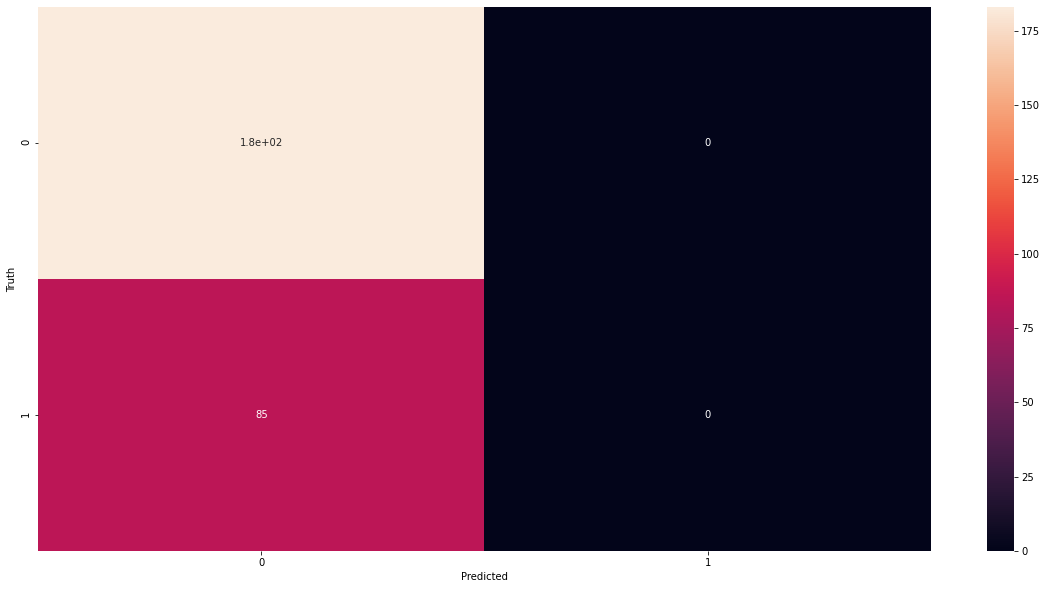

In [73]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(20,10))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [74]:
#the model isnt perfoming great and it can improved by applying more feature engineering tools to handle outliers